<a href="https://colab.research.google.com/github/andipasti/smupo/blob/main/Leeds_MT_Classic_LLM_openai_working_15_04_24_1837.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import os

# Now you can proceed with your code that requires this environment variable
from google.colab import userdata
os.environ['HUGGINGFACE_TOKEN'] = userdata.get('HUGGINGFACE_TOKEN')

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
# Loading the dataset from a JSON file
df = pd.read_json('./drive/Othercomputers/X1/code/datas_mid.json')
display(df)

,issue_id,issue_title,issue_description,journal_id,journal_created_on,journal_notes,journal_author
0,116550,[MBA#1127156] Layout-Anpassung auf Typo 3 - We...,Guten Morgen\r\n\r\nIch habe eine eher speziel...,266857,2024-03-25 10:02:24,Bist du da dran?,0
1,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266862,2024-03-25 10:28:33,> PS: Weiss man was das Problem war? LG Andrea...,0
2,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266861,2024-03-25 10:17:20,KRW Andreas Berger\r\nKSL Cseri Laszlo\r\n\r\n...,0
3,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266851,2024-03-25 09:49:46,Super danke :-)\r\n\r\nTest Servicedesk erfolg...,0
4,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266847,2024-03-25 09:40:21,"Die Warteschlangen werden nun abgebaut, das Sy...",0
...,...,...,...,...,...,...,...
310,116383,"TBZ, Stundenplan: Ferien werden für Mandant 11...",Lieber Support\r\n\r\nBei der TBZ werden die F...,265951,2024-03-04 09:22:33,Die Lektionen in den Ferien werden nun nicht m...,0
311,116383,"TBZ, Stundenplan: Ferien werden für Mandant 11...",Lieber Support\r\n\r\nBei der TBZ werden die F...,265889,2024-03-01 13:52:34,Macht der Importer Unterschiede zwischen den M...,0
312,116382,[MBA#1127498] Zimbra/ tcs.tam.ch Ausfall,Guten Tag\r\n\r\nEinige Schulen melden Problem...,265863,2024-03-01 09:56:53,Jetzt müssten alle User wieder Zugriff auf ihr...,0
313,116382,[MBA#1127498] Zimbra/ tcs.tam.ch Ausfall,Guten Tag\r\n\r\nEinige Schulen melden Problem...,265861,2024-03-01 09:43:02,"Aha! Einer der beiden Proxies hat ein Problem,...",0


In [61]:
column_names = list(df.columns)
print(column_names)

['issue_id', 'issue_title', 'issue_description', 'journal_id', 'journal_created_on', 'journal_notes', 'journal_author']


In [62]:
df.drop(['journal_id', 'journal_created_on', 'journal_author', 'journal_notes', 'issue_id'], axis=1, inplace=True)


In [63]:
column_names = list(df.columns)
print(column_names)


['issue_title', 'issue_description']


In [64]:
# Set Pandas display options to show the full content of 'merged_journal_notes'
pd.set_option('display.max_colwidth', None)
df.head()

,issue_title,issue_description
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen\r\n\r\nIch habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon.\r\n\r\nDie Kantonsschule Wiedikon wünscht eine Layout Anpassung für mobile Geräte zu machen für das Video welches auf der Webseite der KWI (Baustand der Hohlstrasse) hochgeladen wurde. Die Kontaktperson (bei früheren Anpassungen) bei euch war Noemi Schmid. Die Schule wünscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen.\r\nWäre eine Kontaktaufnahme seitens von euch möglich?\r\n\r\nDieses Ticket eilt ein wenig da es schon länger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne Rückmeldung bis jetzt.\r\n \r\nFreundliche Grüsse\r\nKushtrim Veliji\r\n——\r\nBildungsdirektion Kanton Zürich\r\nMittelschul- und Berufsbildungsamt\r\nDigital Service Center Sek II\r\nAusstellungsstrasse 80\r\n8090 Zürich\r\nTelefon 043 259 77 27"
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
2,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
3,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
4,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgende

In [66]:
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({'text': ["Example text\r\n\r\nwith special characters &*%$#@!"]})

# Replace "\r\n\r\n" with a space
df['issue_description'] = df['issue_description'].str.replace(r"\n", " ", regex=True)
df['issue_description'] = df['issue_description'].str.replace(r"\r", " ", regex=True)

# Replace any character that is not a letter, number, or common punctuation with a space
df['issue_description'] = df['issue_description'].str.replace(r"[^a-zA-Z0-9\s.,;!?']", " ", regex=True)

df.head()


,issue_title,issue_description
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis jetzt. Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27"
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"
2,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"
3,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"
4,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"


In [67]:
!pip install openai==0.28

In [68]:
import openai
import pandas as pd

from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
print("DONE")

DONE


In [69]:
import os

# Check if the OPENAI_API_KEY environment variable is set
if "OPENAI_API_KEY" in os.environ:
    print("OpenAI API key is set.")
else:
    print("OpenAI API key is not set.")




OpenAI API key is set.


In [74]:
df['combined_text'] = "Title: " + df['issue_title'] + ". Description: " + df['issue_description']

Create clear ticketinformation using LLM

In [75]:
import os
import pandas as pd
import openai


def rework_ticket_description_with_gptturbo(ticket_text):
    """
    Reworks a ticket description into a structured summary using the GPT-3.5 Turbo model through Chat Completion.

    :param ticket_text: The text of the ticket.
    :return: Reworked ticket text.
    """

    # Explicitly set the OpenAI API key
    openai.api_key = os.getenv("OPENAI_API_KEY")

    detailed_instructions = (
        "You are a highly capable technical supporter. For each issue, provide a summary categorized under the following headers:\n"
        "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
        "- Afftected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
        "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]"
    )

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ]

        )

        # Assuming the response structure has a 'choices' list with at least one item,
        # and 'message' contains the 'content' field with our reworked text.
        if response and 'choices' in response and len(response['choices']) > 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"


In [ ]:
# Apply the function to your DataFrame
df['reworked_information'] = df['combined_text'].apply(rework_ticket_description_with_gptturbo)

# Display the first few rows of the processed DataFrame
df.head()

In [ ]:
# Save the DataFrame to a JSON file
df.to_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket_mid.json', orient='records', lines=True)

# To ensure it's saved, you can also download it to your local system with the following:
from google.colab import files
files.download('./drive/Othercomputers/X1/code/processed_summarization_per_ticket_mid.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read the JSON file into a DataFrame
#df = pd.read_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket.json', lines=True)


END TEST

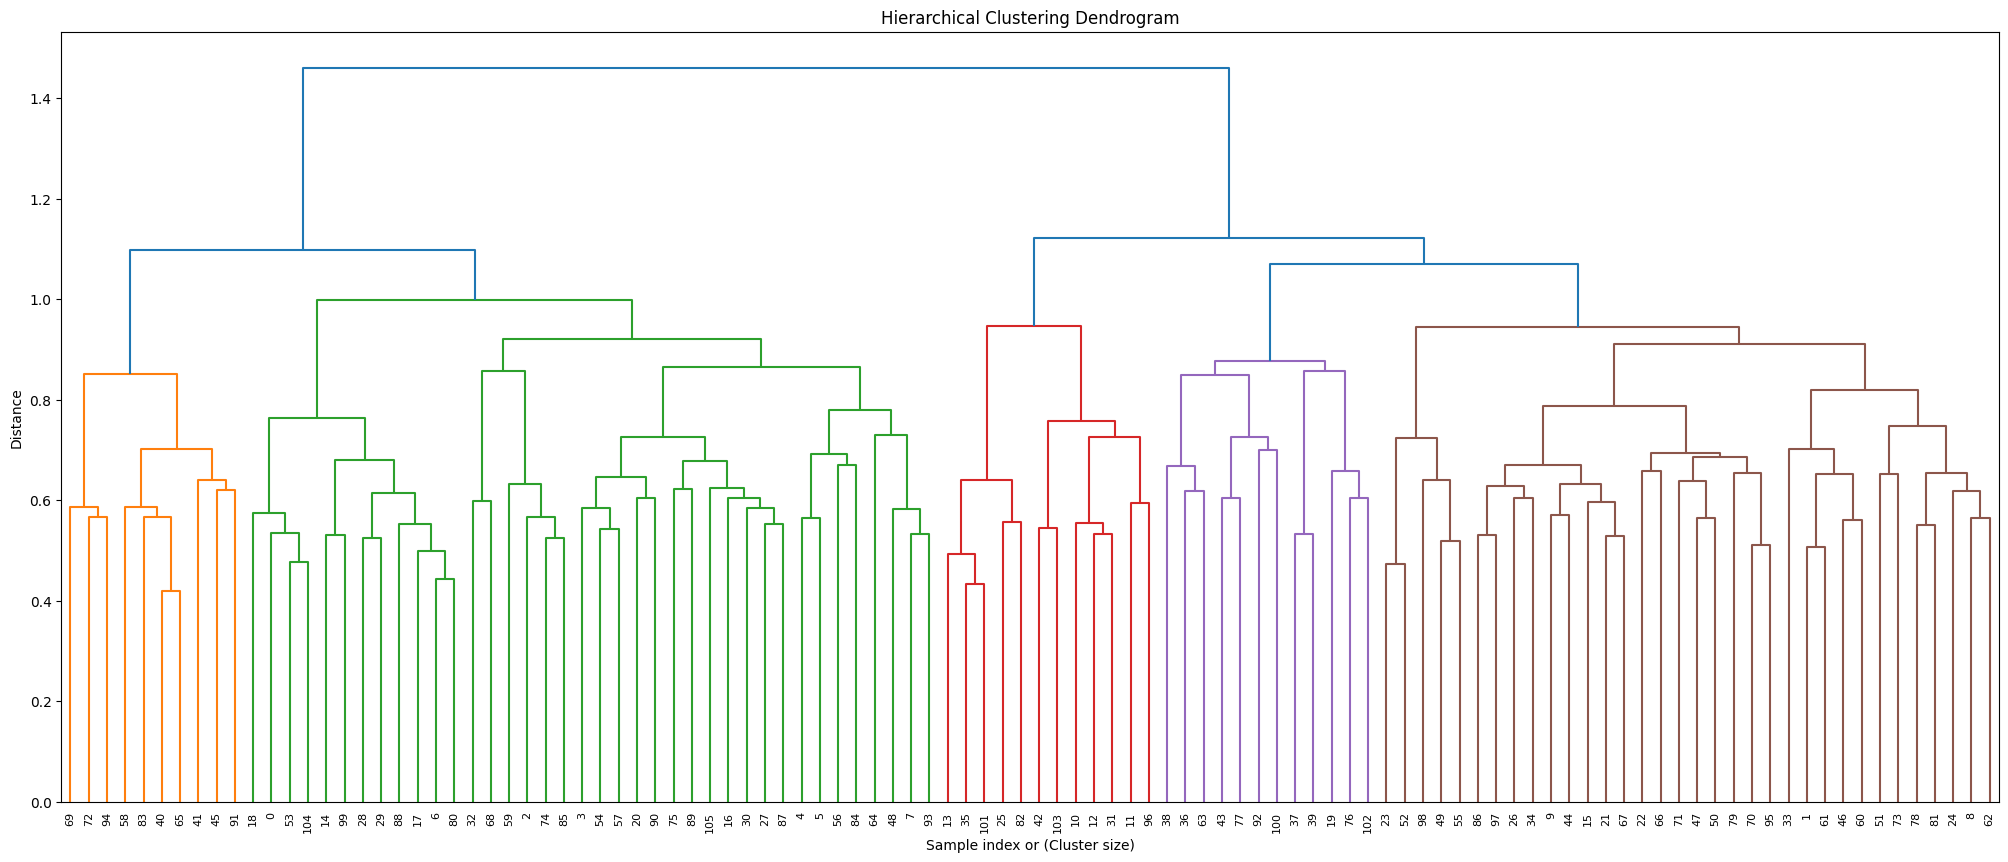

In [ ]:
# TEST VERSIONfrom transformers import AutoTokenizer, AutoModel
import torch
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import openai
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to get embeddings from OpenAI
def get_openai_embeddings(texts):
    embeddings = []
    for text in texts:
        response = openai.Embedding.create(
            input=text,
            engine="text-embedding-ada-002"  # Choose the appropriate engine for your task
        )
        embeddings.append(response['data'][0]['embedding'])
    return np.array(embeddings)

# Assuming df is your DataFrame and 'reworked_information' is the column with texts
texts = df['reworked_information'].tolist()
matrix = get_openai_embeddings(texts)



In [ ]:
# Perform hierarchical clustering
Z = linkage(matrix, 'ward')

# Plot the dendrogram to visualize clusters
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Check with kmeans to be sure about amount of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'matrix' is the embeddings matrix obtained from get_openai_embeddings function
wcss = []
for i in range(1, 11):  # Test for k values from 1 to 10, adjust the range as necessary
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(matrix)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import umap

# Assuming that 'matrix' is already defined and contains your embeddings
# Perform hierarchical clustering to define 'clusters'
Z = linkage(matrix, 'ward')
max_distance = 1.8  # You might need to adjust this based on your dendrogram analysis
clusters = fcluster(Z, max_distance, criterion='distance')

# Now perform UMAP dimensionality reduction
umap_reducer = umap.UMAP()
umap_result = umap_reducer.fit_transform(matrix)  # Using the embeddings matrix directly

# Now plot using UMAP results and the clusters defined above
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.show()


,issue_id,all_information,reworked_information
0,116382,"MBA 1127498 Zimbra tcs.tam.ch Ausfall Guten Tag Einige Schulen melden Probleme mit dem tos.tam.ch Server. Der Server ist nicht erreichbar. Es k nnen keine Email versendet oder erhalten werden. Webmail funktioniert auch nicht tcs.tam.ch keine Anmeldung m glich Betroffene Schulen bis jetzt KS Zimmerberg KS Stadelhofen KS Rychenberg Im Anhang noch Fehlermeldungen von der KS Zimmerberg Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27 Wenn Bilder nicht angezeigt werden Outlook Aktionen im Browser anzeigen Jetzt m ssten alle User wieder Zugriff auf ihre Konten haben und Webmail m sste f r alle wieder funktionieren. Aha! Einer der beiden Proxies hat ein Problem, deshalb haben nicht alle User diesen Effekt. Sollte bald behoben sein. Bei uns funktioniert die Anmeldung. K nnt ihr das problem reproduzieren? Sind nur einzelne User betroffen? Wer konkret zum Beispiel?","Summary:\nSeveral schools are experiencing issues with the tos.tam.ch server, as it is unreachable and users are unable to send or receive emails. Webmail is also not functioning. The affected schools include KS Zimmerberg, KS Stadelhofen, and KS Rychenberg. The user mentions that one of the proxies has an issue causing not all users to be affected. They expect the problem to be resolved soon and request information on whether the problem can be reproduced and which specific users are impacted.\n\nAction Taken:\n- Identified the issue with the tos.tam.ch server leading to email and webmail problems.\n- Noted the specific schools affected.\n- Noted the potential cause of the issue with one of the proxies.\n- Requested information on the affected users and the ability to reproduce the problem."
1,116383,"TBZ, Stundenplan Ferien werden f r Mandant 11 offenbar nicht mehr ber cksichtigt MBA 1127440 Lieber Support Bei der TBZ werden die Ferien jeweils im Mandant 59 erfasst und auch von dort an IN2 exportiert. Die Stundenpl ne kommen dann aus dem jeweiligen Mandanten 11, 39, 40, 59 . Nun scheint es, dass seit den Sportferien die Ferien f r die Stundenpl ne der TBZ IT Mandant 11 nicht mehr oder nur halb ber cksichtigt werden. D.h. die Stundenpl ne dieser Klasse zeigen sowohl in den Sportferien wie auch jetzt in den Fr hlingsferien zwar den Eintrag Ferien , die Lektioneneintr ge jedoch auch. Siehe Beispiel Klasse ICT 22e, Fr hlingsferien vom 22.04.2024 Zum Vergleich eine EE Klasse in der gleichen Woche in den Weihnachtsferien scheint es noch geklappt zu haben, zumindest sehe ich in den Tagesstundenpl ner dieser Zeit keine Eintr ge. K nnt ihr auch f r den Mandanten 11 die Ferien wieder ber cksichtigen bitte. Lieber Gruss Yvonne Lieber Franz Herzlichen Dank f r die R ckmeldung. Dann schliesse ich das Ticket jetzt. Lieber Gruss Yvonne Yvonne Batt wrote in note 4 Besten Dank. Kleine R ckfrage woran lag das? Und galt das ignorieren der Ferien auch f r die Fristen bei den Absenzenprozessen? Falls ja ist das jetzt auch behoben? Also werden auch zuk nftige Ferien und Feiertage zuk nftig f r alles ber cksichtigt? Liebe Yvonne Ich konnte nicht herausfinden, wie es dazu gekommen ist, dass auf diesen Lektionen die Ferien nicht ber cksichtig wurden. I.d.R funktioniert das im gesamten IN2 einwandfrei, es muss also an eine Ausnahmesituation gelegben haben. Es handelt sich lediglich um die fehlende HolidayID auf den einzelnen Lektionen, die dadurch trotzdem angezeigt wurden, es kann also nicht mit Absenzenprozessfristen zu tun haben. Herzlich Franz sorry, besitzer nicht gewechselt Frage siehe oben Lieber Franz Besten Dank. Kleine R ckfrage woran lag das? Und galt das ignorieren der Ferien auch f r die Fristen bei den Absenzenprozessen? Falls ja ist das jetzt auch behoben? Also werden auch zuk nftige Ferien und Feiertage zuk nftig f r alles ber cksichtigt? Herzlicher Gruss Yvonne Die Lektionen in den Ferien

In [ ]:
### how many clusters do we have after the hierarchical clusteirng?
from scipy.cluster.hierarchy import fcluster
import numpy as np

# Assuming 'Z' is your linkage matrix from hierarchical clustering
# Specify the maximum cophenetic distance (this is an example value; adjust based on your dendrogram)
max_distance = 1.3

# Obtain the cluster labels
cluster_labels = fcluster(Z, max_distance, criterion='distance')

# Add the cluster labels to your DataFrame
df['cluster_label'] = cluster_labels

# Count the unique cluster labels
num_clusters = np.unique(cluster_labels).size

print(f"Number of clusters formed: {num_clusters}")


Number of clusters formed: 2


In [ ]:
from transformers import AutoTokenizer, pipeline

# Load tokenizer and summarization model
#tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
#summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer=tokenizer)

def gpt_3_5_turbo_windowed_summarization(text, chunk_max_length=6400, stride=200, final_max_length=150):
    """
    Summarize text using the GPT-3.5-turbo model's chat completion endpoint with specific formatting for technical support issues.
    The summary should categorize the content under 'Issue', 'affected Systems', and 'reported Problem'.
    """
    # Break the text into chunks
    chunks = [text[i:i + chunk_max_length] for i in range(0, len(text), chunk_max_length - stride)]
    chunk_summaries = []

    # Detailed instructions for structured output
    detailed_instructions = (
        "You are a highly capable technical supporter. For each issue, provide a summary categorized under the following headers:\n"
        "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
        "- Afftected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
        "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]"
    )

    # Summarize each chunk
    for chunk in chunks:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": chunk}
            ]
        )
        summary = response['choices'][0]['message']['content']
        chunk_summaries.append(summary)

    # Combine the summaries of all chunks
    combined_summary = " ".join(chunk_summaries)

    return combined_summary


In [ ]:
from transformers import GPT2Tokenizer

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')





In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame with 'reworked_information' and 'cluster_label' columns

# Initialize your summarization function and models here
# from transformers import AutoTokenizer, pipeline
# tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
# summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer=tokenizer)
# def windowed_summarization(text, chunk_max_length=1020, stride=200, final_max_length=50):
    # Your function definition

# Create a new DataFrame for summaries with unique cluster labels
unique_clusters = df['cluster_label'].unique()
df_summaries = pd.DataFrame(unique_clusters, columns=['cluster_label'])
df_summaries['summary'] = "NIX"  # Initialize the 'summary' column with a placeholder

for cluster_num in df['cluster_label'].unique():
    # Extract texts for the current cluster and combine them
    cluster_texts = df[df['cluster_label'] == cluster_num]['reworked_information'].tolist()
    combined_text = " ".join(cluster_texts)


    # Summarize the combined text
    # summary = windowed_summarization(combined_text)
    summary = gpt_3_5_turbo_windowed_summarization(combined_text)

    # Correctly update the 'summary' in df_summaries for the current cluster_label
    # We find the row where 'cluster_label' matches cluster_num and update the 'summary' for that row
    df_summaries.loc[df_summaries['cluster_label'] == cluster_num, 'summary'] = summary

    print("*************** CLUSTER NUM ", cluster_num , " ************\n")

    print(summary)  # Optionally print the summary for verification
    print("\n")


*************** CLUSTER NUM  1  ************

Issue: IT Systems
Affected Systems: Email Servers, Webmail
Reported Problem: Inability to send or receive emails, unreachable tos.tam.ch server, webmail not functioning at schools KS Zimmerberg, KS Stadelhofen, KS Rychenberg due to an issue with the tos.tam.ch server leading to email and webmail problems.

Issue: IT Systems
Affected Systems: Invoicing System
Reported Problem: Request for manual triggering of invoice for KS Zürcher Oberland BK 7316 dated 26.02.2024 as the CSV file was not received, with difficulties in locating the correct file and understanding the process.

Issue: IT Systems
Affected Systems: Intranet, Security
Reported Problem: School's Intranet is unreachable, potential hack attempt by a student, security measures in place prevented a successful attack.

Issue: IT Systems
Affected Systems: Security, Intranet
Reported Problem: User reports a student attempted a password attack causing the Intranet to go offline, script ru

In [ ]:
df_summaries.head()

cluster_label  \
0              1   
1              2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
import pandas as pd
import openai

# Assuming df_summaries is your DataFrame containing the summaries
cluster_labels = {}

def generate_label_for_summary(summary):
    conversation = [
        {"role": "system", "content": "You are a highly capable technical consultant."},
        {"role": "user", "content": f"Create 3 one-word-labels, that describes the following summary: {summary}"}
    ]

    try:
        # Call to OpenAI's GPT-3.5 Turbo API using the ChatCompletion endpoint
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=conversation,
            max_tokens=40,  # Adjust based on desired label length
            temperature=0.3  # A lower temperature for more deterministic output
        )
        label = response['choices'][0]['message']['content'].strip()
        return label
    except Exception as e:
        print(f"Error generating label: {e}")
        return "Label generation error"

def ensure_unique_labels(df):
    unique_labels = {}
    for index, row in df.iterrows():
        summary = row['summary']
        if summary not in unique_labels:
            label = generate_label_for_summary(summary)
            # Ensure label uniqueness
            while label in unique_labels.values():
                label = generate_label_for_summary(summary)  # Regenerate label if not unique
            unique_labels[summary] = label
            df.at[index, 'label'] = label
        else:
            df.at[index, 'label'] = unique_labels[summary]  # Use already assigned label if summary repeated

    return df

# Apply unique label generation
df_summaries = ensure_unique_labels(df_summaries)
df_summaries.head()


cluster_label  \
0              1   
1              2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      